# Import data and packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as g
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
from pylab import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data = pd.read_csv('fafsa_by_locat_by_age.csv')

summarydata = pd.read_csv('portfolio summary.csv')

data2 = pd.read_csv('fafsa_by_locat_by_age2.csv')

In [3]:
data.head()

,Unnamed: 0,Location,Balance in billions,Borrowers in thousands,State population,24 and younger,25 to34,35 to 49,50 to 61,62 and older
0,1,Alabama,22.6,613.7,4903185,$1.74,$7.07,$9.31,$3.55,$0.96
1,2,Alaska,2.2,66.5,731545,$0.11,$0.74,$0.93,$0.36,$0.11
2,3,Arizona,30.0,856.0,7278717,$1.68,$9.41,$12.27,$5.05,$1.62
3,4,Arkansas,12.5,377.5,3017804,$0.97,$4.03,$5.22,$1.82,$0.49
4,5,California,140.1,3854.1,39512223,$8.96,$50.09,$50.87,$22.28,$7.89


In [4]:
summarydata.head(50)

,Unnamed: 0,Federal Fiscal Year2,Dollars Outstanding (in billions)_1,Unduplicated Recipients (in millions)
0,1,2007,516.0,28.3
1,2,2008,577.0,29.9
2,3,2009,657.0,32.1
3,4,2010,749.8,34.3
4,5,2011,848.2,36.5
5,6,2012,948.2,38.3
6,7,2013,1040.2,39.6
7,8,2014,1129.8,40.7
8,9,2015,1212.4,41.6
9,10,2016,1292.2,42.3


In [33]:
summarydata.info()
summarydata.rename(columns={'Dollars Outstanding            (in billions)_1': 'Dollars outstanding(in billions)',}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                14 non-null     int64  
 1   Federal Fiscal Year2                      14 non-null     int64  
 2   Dollars outstanding(in billions)          14 non-null     float64
 3   Unduplicated Recipients    (in millions)  14 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 576.0 bytes


### Changed columns to have type. float for statistical analysis

In [21]:
data.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                51 non-null     object 
 1   Balance in billions     51 non-null     float64
 2   Borrowers in thousands  51 non-null     float64
 3   State population        51 non-null     int64  
 4   24 and younger          51 non-null     object 
 5   25 to34                 51 non-null     object 
 6   35 to 49                51 non-null     object 
 7   50 to 61                51 non-null     object 
 8   62 and older            51 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               51 non-null 

## cleaning data/coverting object type to float

In [62]:
data['24 and younger'] = data['24 and younger'].str.replace('$', '').str.replace(',','')

In [63]:
data['24 and younger'] = pd.to_numeric(data['24 and younger'])

In [66]:
data['25 to34'] = data['25 to34'].str.replace('$', '').str.replace(',','')

In [67]:
data['25 to34'] = pd.to_numeric(data['25 to34'])

In [68]:
data['35 to 49'] = data['35 to 49'].str.replace('$', '').str.replace(',','')

In [69]:
data['35 to 49'] = pd.to_numeric(data['35 to 49'])

In [70]:
data['50 to 61'] = data['50 to 61'].str.replace('$', '').str.replace(',','')

In [71]:
data['50 to 61'] = pd.to_numeric(data['50 to 61'])

In [72]:
data['62 and older'] = data['62 and older'].str.replace('$', '').str.replace(',','')

In [96]:
data['62 and older'] = pd.to_numeric(data['62 and older'])
data['State population'] = data['State population'].astype(float)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              51 non-null     int64  
 1   Location                51 non-null     object 
 2   Balance in billions     51 non-null     float64
 3   Borrowers in thousands  51 non-null     float64
 4   State population        51 non-null     float64
 5   24 and younger          51 non-null     float64
 6   25 to34                 51 non-null     float64
 7   35 to 49                51 non-null     float64
 8   50 to 61                51 non-null     float64
 9   62 and older            51 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 4.1+ KB


### check for na values

In [76]:
data.isna().sum()

Unnamed: 0                0
Location                  0
Balance in billions       0
Borrowers in thousands    0
State population          0
24 and younger            0
25 to34                   0
35 to 49                  0
50 to 61                  0
62 and older              0
dtype: int64

In [2]:
data2 = data2.drop(['Balance.in.billionsSQ','Balance.in.billionsSQRT', 'Unnamed: 0'], axis = 1)

NameError: name 'data2' is not defined

In [10]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [9]:
corrdata = data.drop(['Unnamed: 0', '24 and younger', '25 to34', '35 to 49', '50 to 61', '62 and older'], axis = 1)

## data exploration analysis

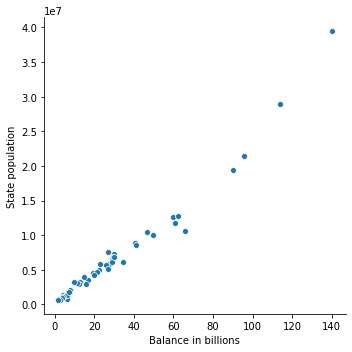

In [11]:
regionplot = sns.relplot(
    data=data,
    x="Balance in billions", y="State population",
    palette='coolwarm'
)

In [12]:
corrdata.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Balance in billions,Borrowers in thousands,State population
Balance in billions,1.0,1.0,0.98
Borrowers in thousands,1.0,1.0,0.99
State population,0.98,0.99,1.0


In [30]:
summarydata.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Unnamed: 0,Federal Fiscal Year2,Dollars outstanding(in billions),Unduplicated Recipients (in millions)
Unnamed: 0,1.0,1.0,1.0,0.94
Federal Fiscal Year2,1.0,1.0,1.0,0.94
Dollars outstanding(in billions),1.0,1.0,1.0,0.96
Unduplicated Recipients (in millions),0.94,0.94,0.96,1.0


In [29]:
data2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Unnamed: 0,Balance in billions,Borrowers in thousands,State population,Twentyfour.and.younger,25 to34,35 to 49,50 to 61,62 and older,Balance.in.billionslog,Percentage.of.Borrowers
Unnamed: 0,1.0,-0.076,-0.053,-0.07,-0.0017,-0.069,-0.086,-0.086,-0.11,-0.093,-0.13
Balance in billions,-0.076,1.0,1.0,0.98,0.96,1.0,0.99,1.0,0.99,0.85,0.052
Borrowers in thousands,-0.053,1.0,1.0,0.99,0.96,0.99,0.99,0.99,0.98,0.85,0.042
State population,-0.07,0.98,0.99,1.0,0.92,0.98,0.97,0.97,0.98,0.79,-0.062
Twentyfour.and.younger,-0.0017,0.96,0.96,0.92,1.0,0.97,0.92,0.96,0.94,0.86,0.13
25 to34,-0.069,1.0,0.99,0.98,0.97,1.0,0.98,0.99,0.99,0.85,0.045
35 to 49,-0.086,0.99,0.99,0.97,0.92,0.98,1.0,0.99,0.97,0.85,0.044
50 to 61,-0.086,1.0,0.99,0.97,0.96,0.99,0.99,1.0,0.99,0.85,0.059
62 and older,-0.11,0.99,0.98,0.98,0.94,0.99,0.97,0.99,1.0,0.82,0.01
Balance.in.billionslog,-0.093,0.85,0.85,0.79,0.86,0.85,0.85,0.85,0.82,1.0,0.3


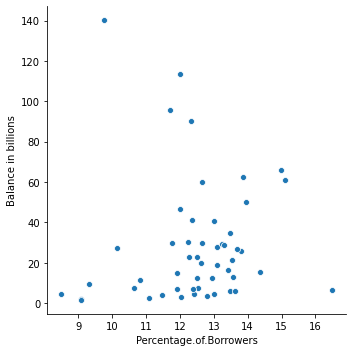

In [15]:
regionplot = sns.relplot(
    data=data2,
    x="Percentage.of.Borrowers", y="Balance in billions",
    palette='coolwarm'
)

### linear regression

In [117]:
x = fafsa_by_locat_by_age['Federal Fiscal Year2']
y = summarydata['Dollars outstanding(in billions)']

In [120]:
model = sm.OLS(y,x).fit()

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f970d2453d0>>

In [121]:
pred_val = model.fittedvalues.copy()
true_val = summarydata['Dollars outstanding(in billions)'].values.copy()
residual = true_val - pred_val

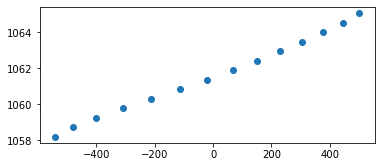

In [122]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [123]:
sms.diagnostic.het_breuschpagan(residual, summarydata[['Federal Fiscal Year2']])

(8.246881632478127, nan, 18.635017458956888, 0.0008367810807284629)

In [124]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=9.517581452786882, pvalue=2.4961197619149317e-06)

In [126]:
transformed, _ = boxcox(summarydata['Federal Fiscal Year2'])

(array([2., 1., 1., 2., 1., 1., 2., 1., 1., 2.]),
 array([386.30737757, 386.49430634, 386.68123511, 386.86816389,
        387.05509266, 387.24202143, 387.4289502 , 387.61587897,
        387.80280774, 387.98973652, 388.17666529]),
 <a list of 10 Patch objects>)

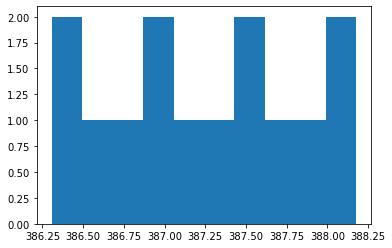

In [127]:
plt.hist(transformed)

In [129]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Dollars outstanding(in billions)   R-squared (uncentered):                   0.908
Model:                                          OLS   Adj. R-squared (uncentered):              0.901
Method:                               Least Squares   F-statistic:                              127.8
Date:                              Tue, 15 Jun 2021   Prob (F-statistic):                    4.25e-08
Time:                                      16:39:10   Log-Likelihood:                         -101.41
No. Observations:                                14   AIC:                                      204.8
Df Residuals:                                    13   BIC:                                      205.5
Df Model:                                         1                                                  
Covariance Type:                          nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Federal Fiscal Year2     0.5273      0.047     11.307      0.000       0.427       0.628
==============================================================================
Omnibus:                        2.419   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                1.023
Skew:                          -0.116   Prob(JB):                        0.600
Kurtosis:                       1.696   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
x = summarydata[['Federal Fiscal Year2', 'Unduplicated Recipients    (in millions)']]
y = summarydata['Dollars outstanding(in billions)']

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [138]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8, 2) (8,)
(6, 2) (6,)


In [140]:
lm = LinearRegression()

In [141]:
lm.fit(x_train, y_train)

LinearRegression()

In [142]:
predictions = lm.predict(x_test)
predictions

array([1521.80953503,  680.39595396,  772.3232343 , 1598.44303956,
       1366.45701109,  953.39710846])

In [143]:
print("Score:", lm.score(x_test, y_test))

Score: 0.997163595933311


In [144]:
metrics.mean_squared_error(y_test, predictions)

374.58621822972896

In [145]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

19.354229982867544